<a href="https://colab.research.google.com/github/eduardogil11/Desarrolllo-de-aplicaciones-avanzadas-Modulo-2-IA/blob/main/Data_augmentation_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation Pokemon

### Eduardo Rodríguez Gil - A01274913

De un Dataset que ya existia obtuve varias imágenes de los diferentes Pokemon que existen y cree mi propio Dataset clasificando a los Pokemon por 4 tipos Water, Fire, Grass y Electric.

Conectamos Drive y nuestra carpeta de Drive que previamente creeamos que contiene las imagenes de los Pokemon

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Actividad Data Augmentation Pokemon"
!ls

Mounted at /content/drive
/content/drive/MyDrive/Actividad Data Augmentation Pokemon
augmented  images


En esta parte importamos las librerias que vamos a utilizar a lo largo del programa.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, models, layers

Utilizamos TensorFlow especificamente ImageDataGenerator para crear nuevas imágenes de las que contiene nuestro Dataset de Pokemon, donde le indicamos las características que queremos que tengan.

In [ ]:
path = "/content/drive/MyDrive/Actividad Data Augmentation Pokemon"
base_dir = 'images'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
							  rescale = 1./255,
							  rotation_range = 40,
							  width_shift_range = 0.2,
							  height_shift_range = 0.2,
							  shear_range = 0.3,
							  zoom_range = 0.3,
							  horizontal_flip = True)

Después utilizamos el directorio de train para probar que efectivamente las imágenes se están modificando como lo indicamos anteriormente, para esto solo vamos a ser la prueba con una imágen aleatoria de nuestro Dataset y quise mostrar como se generarían 6 imágenes diferentes con ImageDataGenerator.

Found 362 images belonging to 6 classes.


<Figure size 640x480 with 0 Axes>

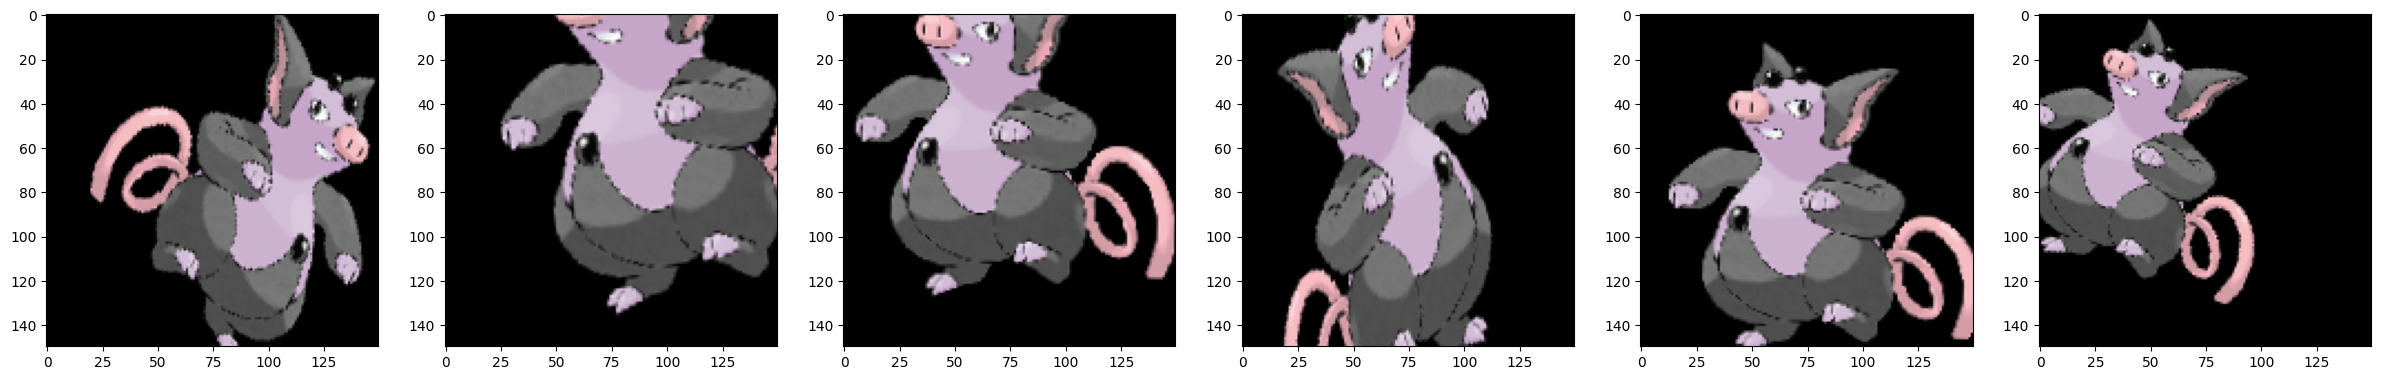

In [ ]:
train_generator = train_datagen.flow_from_directory(
									train_dir,
									target_size = (150, 150),
									batch_size = 1,
									class_mode ='categorical')

plt.figure()
f, axarr = plt.subplots(1, 6, figsize=(30, 8)) 

for i in range(6) :
  axarr[i].imshow(train_generator[0][0][0])

Para este punto vamos a realizar lo mismo que realizamos anteriormente pero ahora mostrando 10 imágenes que se modificarán solo una vez y como podemos observar agarra aleatoriamente de nuestro Dataset de cualquier tipo de Pokemon.

Found 362 images belonging to 6 classes.
(10, 150, 150, 3)


<Figure size 640x480 with 0 Axes>

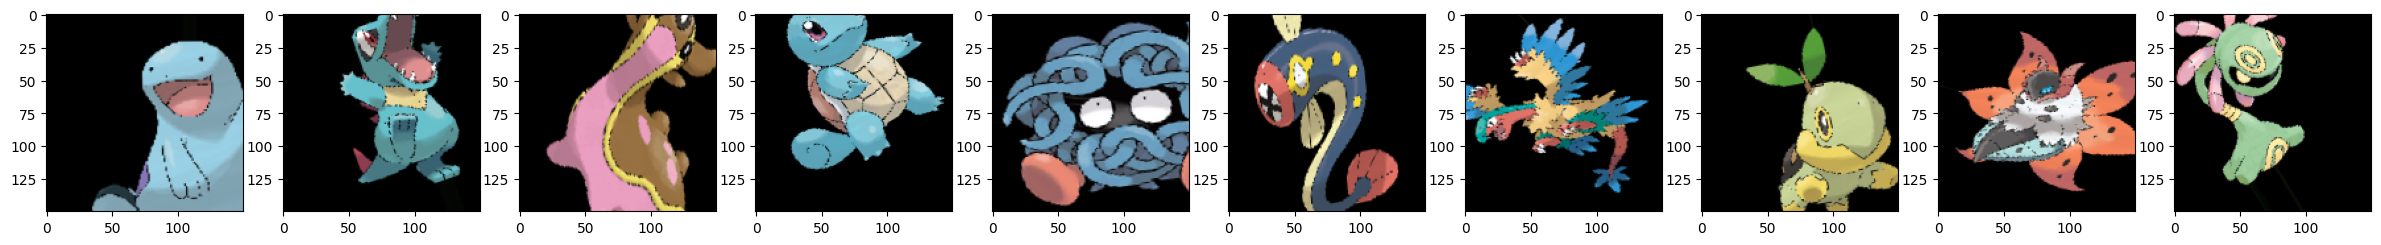

In [ ]:
train_generator = train_datagen.flow_from_directory(
									train_dir,
									target_size = (150, 150),
									batch_size = 10,
									class_mode ='categorical')

images , labels = train_generator[0]

print(images.shape)

plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

Aquí vamos a indicarle que nos guarde todas nuestras imágenes que se generen por el ImageDataGenerator en una carpeta ya antes creada llamada augmented, aún que la podemos llamar como queramos. Esto nos servira si es que queremos posteriormente revisar con que imágenes entreno el modelo y como fueron las nuevas imágenes que género.

In [ ]:
train_generator = train_datagen.flow_from_directory(
									train_dir,
									target_size = (150, 150),
									batch_size = 8,
									class_mode ='categorical',
									save_to_dir= path + '/augmented',   
             		 	save_prefix='aug',
              		save_format='png')

Found 362 images belonging to 6 classes.


En este apartado vamos a crear un modelo simple por el momento, solo para ver como funciona el procesado de los datos y para poder mostrar las nuevas imágenes que se enviaran a la carpeta augmented ya antes mencionada. Este modelo sera trabajado más adelante, para mejorarlo y poder obtener un mejor acurracy.

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 148, 148, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 72, 72, 64)       256       
 hNormalization)                                                 
                                                      

Aquí vamos a indicar la cantidad de epocas donde por el momento vamos a poner solo 10 para que no tarde mucho el proceso, ya que ahorita buscamos ver el procesado, para cuando mejoremos el modelo se utilizara más epocas para poder obtener un mejor accuracy. En esta parte también imprimimos gráficas de como fue evolucionando nuestro modelo en cuanto a accuracy y loss.

Epoch 1/25
46/46 [==============================] - 63s 1s/step - loss: 2.6502 - acc: 0.2459
Epoch 2/25
46/46 [==============================] - 35s 761ms/step - loss: 2.3570 - acc: 0.3122
Epoch 3/25
46/46 [==============================] - 39s 858ms/step - loss: 2.1391 - acc: 0.3536
Epoch 4/25
46/46 [==============================] - 35s 767ms/step - loss: 1.9803 - acc: 0.3674
Epoch 5/25
46/46 [==============================] - 35s 761ms/step - loss: 1.8360 - acc: 0.3895
Epoch 6/25
46/46 [==============================] - 37s 811ms/step - loss: 1.8185 - acc: 0.4088
Epoch 7/25
46/46 [==============================] - 46s 992ms/step - loss: 1.8680 - acc: 0.3729
Epoch 8/25
46/46 [==============================] - 36s 789ms/step - loss: 1.7371 - acc: 0.4227
Epoch 9/25
46/46 [==============================] - 38s 814ms/step - loss: 1.6589 - acc: 0.4448
Epoch 10/25
46/46 [==============================] - 36s 774ms/step - loss: 1.8053 - acc: 0.3785
Epoch 11/25
46/46 [=======================

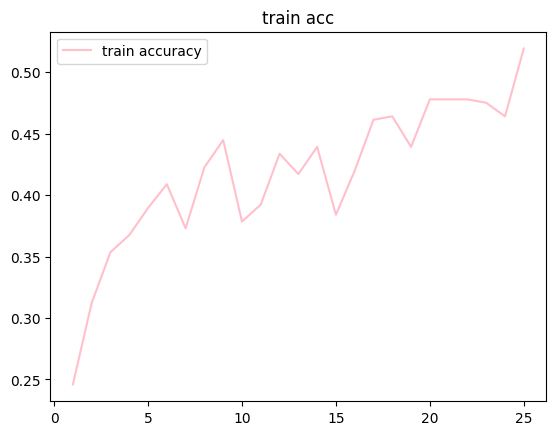

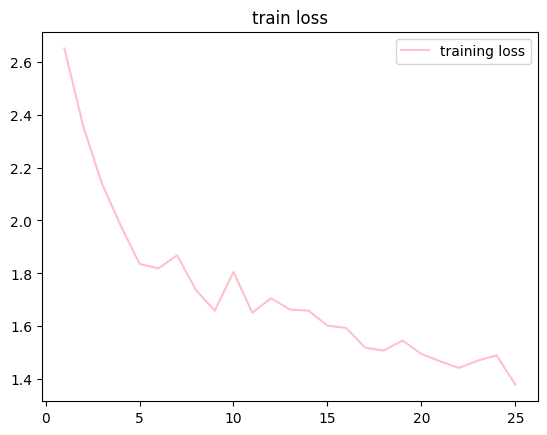

In [ ]:
history = model.fit(train_generator, epochs = 25)
			
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'-',label='train accuracy', color='pink')
plt.title('train acc')
plt.legend()
plt.figure()

plt.plot(epochs,loss, '-', label ='training loss', color='pink')
plt.title('train loss')
plt.legend()
plt.show()